In [4]:
#Generate and load facial encodings in a file
import face_recognition
import dlib
import pickle
face_encodings = {}
Murtuz = face_recognition.load_image_file('yourpic.jpg')
face_encodings["yourname"] = face_recognition.face_encodings(Murtuz)[0]
#Storing all the facial encodings and names as a dict object to a file
with open('faces_security.dat', 'wb') as f:
    pickle.dump(face_encodings, f)
    print('Data Stored')

Data Stored


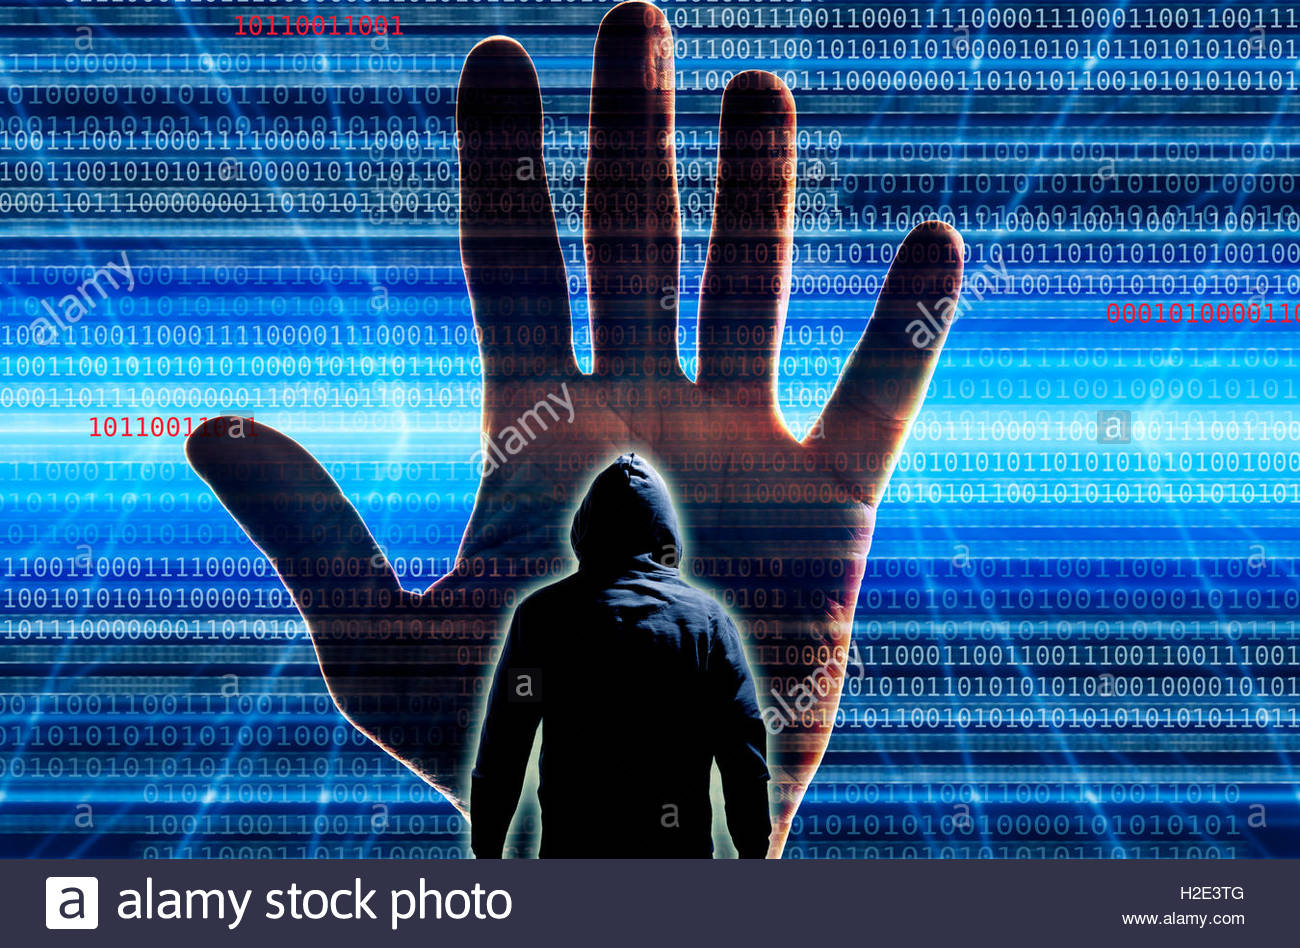

In [5]:
#Full Code
#******************************************************
def load_faces():
    #with open('dataset_faces.dat', 'rb') as f:
    with open('faces_security.dat','rb') as f:
        all_face_encodings = pickle.load(f)

# Grab the list of names and the list of encodings
    known_faces_names = list(all_face_encodings.keys())
    known_faces_encodings = np.array(list(all_face_encodings.values()))

   # print("The Databases contains metadata of these faces" +  str(known_faces_names))
    name = known_faces_names[0].split('_')
    
    return [known_faces_names,known_faces_encodings,name]

#******************************************************
def send_message(): #Sending whatsapp message with the picture of the hacker

    # client credentials are read from TWILIO_ACCOUNT_SID and AUTH_TOKEN
    account_sid = 'Get your own from twilio'
    auth_token = 'Get your own from twilio'
    client = Client(account_sid,auth_token)

    # this is the Twilio sandbox testing number
    from_whatsapp_number='whatsapp:+14155238886'
    # replace this number with your own WhatsApp Messaging number
    to_whatsapp_number='whatsapp:+91 your number'

    client.messages.create(body='["SECURITY-ALERT"] An attempt is being made to hack your machine.' 
                           'The Picture is mailed to you,please take immediate action',
                           from_=from_whatsapp_number,
                           to=to_whatsapp_number)
                           #media = ['Thief_data.jpg'])
    print("Whatsapp message successfully sent..!!")
#***************************************************
def send_mail():
    with open('login_data.dat', 'rb') as f:
        login_data = pickle.load(f)
    #print(login_data["username"])
    # list of email_id to send the mail 
    send_email = ["yourmail.com"]
    subject = "[SECURITY ALERT] - Unauthorized access to your Laptop"
    message = "The following person is trying to get access to your information"
    file_location = "Thief_data.jpg"
    msg = MIMEMultipart()
    msg['From'] = login_data["username"]
    msg['To'] = login_data["password"]
    msg['Subject'] = subject
    msg.attach(MIMEText(message, 'plain'))
    li = ["mc1397@protonmail.com"]
    # Setup the attachment
    filename = os.path.basename(file_location)
    attachment = open(file_location, "rb")
    part = MIMEBase('application', 'octet-stream')
    part.set_payload(attachment.read())
    encoders.encode_base64(part)
    part.add_header('Content-Disposition', "attachment; filename= %s" % filename)

    # Attach the attachment to the MIMEMultipart object
    msg.attach(part)

    for i in range(len(li)): 
        s = smtplib.SMTP('smtp.gmail.com', 587) 
        s.starttls() 
        s.login(login_data["username"], login_data["password"]) 
        text = msg.as_string()
        s.sendmail("yourmail.com", send_email[i], text)
        print("The mail has been delivered")
        s.quit()

#***************************************************
def take_action():
        print('You are an unathorized user,this incident will be reported to the Murtuza')
        _,frame = video_capture.read()
        date = str(datetime.date(datetime.now()))
        time = str(datetime.time(datetime.now()))[:5]
        dt = str("DATE:- " + date + " ")
        tm = str("TIME:- " + time + " ")
        cv2.putText(frame, dt, (2, 40), font, 1.0, (45,6,199), 2)
        cv2.putText(frame, tm, (400, 40), font, 1.0, (0,240,28), 2)
        #cv2.destroyAllWindows()
        #cv2.imshow('Thief',frame)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()
        cv2.imwrite('Thief_data.jpg',frame)
        engine.say("Unauthorized access to Murtuza's machine")
        engine.runAndWait()
        send_message() #Whatsapp message
        send_mail()  #Mail
        engine.say('You have been reported to Murtuza')
        engine.runAndWait()
        os.system('systemctl suspend')

#***************************************************
def welcome():
    engine.say("Welcome back murtuza to your machine")
    engine.runAndWait()

#***************************************************
import face_recognition
import cv2
import numpy as np
from datetime import datetime
import pickle
import os
import pyttsx3
from twilio.rest import Client
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders

# Get a reference to webcam #0 (the default one)
video_capture = cv2.VideoCapture(0)


# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True
(known_faces_names,known_faces_encodings,name) = load_faces()
engine = pyttsx3.init()
engine.setProperty('rate',150)
engine.setProperty('voice', 'english+f3')
cnt =0 #Used as a counter to check if the other person crosses a certain threshold.
mcnt =0 #Used as a counter for the owner of the laptop's image.

while True:
    # Grab a single frame of video
    if cnt > 5: #If other person is trying to access your system
        take_action()
        break
    if mcnt > 10: #If owner is trying to access your system.
        welcome()
        break
    
    ret, frame = video_capture.read()
    #fcnt +=1

    # Resize frame of video to 1/4 size for faster face recognition processing
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

    # Only process every other frame of video to save time
    if process_this_frame:
        # Find all the faces and face encodings in the current frame of video
        face_locations = face_recognition.face_locations(small_frame)
        face_encodings = face_recognition.face_encodings(small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(known_faces_encodings, face_encoding)
            name = "Unknown"
            face_names.append(name)
            #first_match_index = " "
            # # If a match was found in known_face_encodings, just use the first one.
            if True in matches:
                face_names.clear()
                first_match_index = matches.index(True)
                name = known_faces_names[first_match_index]

            if matches[first_match_index]:
                name = known_faces_names[first_match_index]
                face_names.append(name)
            

   # process_this_frame = not process_this_frame


    # Display the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (25, 230, 252), 4)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (250, 60, 231), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (133, 58, 4), 2)
        if name!='Murtuza':
            #print('Some other person')
            cnt+=1
        else:
            mcnt+=1

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()
#******************************************************


You are an unathorized user,this incident will be reported to the Murtuza
Whatsapp message successfully sent..!!
The mail has been delivered
